In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [5]:
###training image preprocessing
training_set=validattion_set=image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70243 files belonging to 38 classes.


In [6]:
#validation image preprocessing

validation_set=image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17557 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in validation_set:
    print(x,x.shape)
    print(y,y.shape)
    break


tf.Tensor(
[[[[136.25 123.25 130.25]
   [131.   118.   125.  ]
   [151.75 138.75 145.75]
   ...
   [132.25 117.25 122.25]
   [102.75  87.75  92.75]
   [106.5   91.5   96.5 ]]

  [[126.75 113.75 120.75]
   [124.5  111.5  118.5 ]
   [138.   125.   132.  ]
   ...
   [123.25 108.25 113.25]
   [ 99.25  84.25  89.25]
   [104.    89.    94.  ]]

  [[133.   120.   127.  ]
   [123.   110.   117.  ]
   [130.5  117.5  124.5 ]
   ...
   [119.   104.   109.  ]
   [112.5   97.5  102.5 ]
   [102.25  87.25  92.25]]

  ...

  [[150.5  134.5  144.5 ]
   [150.75 134.75 144.75]
   [152.5  136.5  146.5 ]
   ...
   [138.25 123.25 128.25]
   [138.25 123.25 128.25]
   [139.75 124.75 129.75]]

  [[154.5  138.5  148.5 ]
   [155.5  139.5  149.5 ]
   [155.5  139.5  149.5 ]
   ...
   [144.75 129.75 134.75]
   [143.5  128.5  133.5 ]
   [138.25 123.25 128.25]]

  [[150.   134.   144.  ]
   [154.   138.   148.  ]
   [156.25 140.25 150.25]
   ...
   [138.5  123.5  128.5 ]
   [139.   124.   129.  ]
   [139.5  124.5  12

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model=Sequential()

In [11]:
#building convolutional layers

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\pavit\Documents\ML\tf\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Dropout(0.25)) #To avoid overfitting

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500,activation='relu')) 
#inceasing no. of neurons prevents underfitting

In [20]:
model.add(Dropout(0.4))

In [21]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

Compiling The Model

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [24]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 3476s 2s/step - accuracy: 0.3979 - loss: 2.1383 - val_accuracy: 0.8214 - val_loss: 0.5727
Epoch 2/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 3266s 1s/step - accuracy: 0.8362 - loss: 0.5255 - val_accuracy: 0.8862 - val_loss: 0.3634
Epoch 3/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 4079s 2s/step - accuracy: 0.9069 - loss: 0.2917 - val_accuracy: 0.9328 - val_loss: 0.2117
Epoch 4/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 3158s 1s/step - accuracy: 0.9341 - loss: 0.1988 - val_accuracy: 0.9459 - val_loss: 0.1735
Epoch 5/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 2902s 1s/step - accuracy: 0.9529 - loss: 0.1415 - val_accuracy: 0.9530 - val_loss: 0.1461
Epoch 6/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 4612s 2s/step - accuracy: 0.9629 - loss: 0.1130 - val_accuracy: 0.9599 - val_loss: 0.1307
Epoch 7/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 3693s 2s/step - accuracy: 0.9713 - loss: 0.0877 - val_accuracy: 0.9581 - val_loss: 0.1436
Epoch 8/10
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 22815s 10s/step - accuracy: 0.9734

## Model Evaluation

In [25]:
train_loss,train_acc=model.evaluate(training_set)

2196/2196 ━━━━━━━━━━━━━━━━━━━━ 943s 429ms/step - accuracy: 0.9744 - loss: 0.0796


In [26]:
print(train_loss,train_acc)

0.07390686869621277 0.9757840633392334


In [27]:
val_loss,val_acc=model.evaluate(validation_set)

549/549 ━━━━━━━━━━━━━━━━━━━━ 254s 462ms/step - accuracy: 0.9426 - loss: 0.1962


In [29]:
print(val_loss,val_acc)

0.1907159984111786 0.9436122179031372


Saving your trained model

In [31]:
model.save("trained_model.keras")

In [32]:
training_history.history

{'accuracy': [0.6019816994667053,
  0.8603277206420898,
  0.9162194132804871,
  0.9381433129310608,
  0.9544011354446411,
  0.963555097579956,
  0.9712996482849121,
  0.9755847454071045,
  0.9801973104476929,
  0.9810230135917664],
 'loss': [1.3556857109069824,
  0.4472343623638153,
  0.26133546233177185,
  0.1890457570552826,
  0.13813066482543945,
  0.11046101152896881,
  0.08720945566892624,
  0.07275954633951187,
  0.061657387763261795,
  0.057605426758527756],
 'val_accuracy': [0.8213818073272705,
  0.8861992359161377,
  0.9327903389930725,
  0.9458905458450317,
  0.9529532194137573,
  0.9599020481109619,
  0.9581363797187805,
  0.953522801399231,
  0.9576237201690674,
  0.9436122179031372],
 'val_loss': [0.5727109313011169,
  0.3633621335029602,
  0.21167612075805664,
  0.17352662980556488,
  0.14612053334712982,
  0.13074594736099243,
  0.1436009556055069,
  0.1664086878299713,
  0.15058983862400055,
  0.19071614742279053]}

In [34]:
#recording history
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

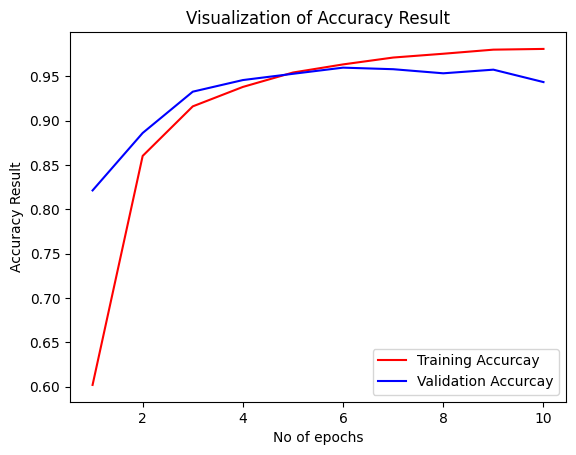

In [37]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accurcay')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accurcay')
plt.ylabel("Accuracy Result")
plt.xlabel("No of epochs")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Metrics for model evaluation

In [39]:
class_name=validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [40]:
test_set=image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17557 files belonging to 38 classes.


In [43]:
y_pred=model.predict(test_set)
y_pred

549/549 ━━━━━━━━━━━━━━━━━━━━ 249s 453ms/step


array([[9.99999881e-01, 1.42150085e-11, 9.07481067e-13, ...,
        3.66520553e-17, 3.06550435e-16, 5.61617202e-16],
       [9.99994278e-01, 5.34039918e-06, 5.09111260e-08, ...,
        1.39433842e-12, 7.13703489e-12, 4.71460284e-12],
       [1.00000000e+00, 2.46048928e-11, 4.43139882e-13, ...,
        3.80391122e-21, 8.19919776e-19, 2.66912076e-18],
       ...,
       [6.47444320e-11, 4.01433769e-13, 2.82468360e-08, ...,
        1.35458132e-13, 1.88949572e-12, 9.99999762e-01],
       [2.12913722e-08, 8.89270463e-11, 2.08356497e-07, ...,
        4.18636306e-11, 1.42021811e-10, 9.99998808e-01],
       [5.34310240e-09, 6.15390894e-09, 7.61604468e-08, ...,
        2.42390574e-09, 1.91774348e-07, 9.99152660e-01]], dtype=float32)

In [46]:
y_pred.y_pred.shape

AttributeError: 'numpy.ndarray' object has no attribute 'y_pred'

In [47]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [48]:
predicted_categories

<tf.Tensor: shape=(17557,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [49]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17557, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [51]:
Y_true=tf.argmax(true_categories,axis=1)

In [57]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.94      0.93       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.97      0.96       440
                                   Apple___healthy       0.95      0.92      0.94       502
                               Blueberry___healthy       0.96      0.96      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.96      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.91      0.92       395
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

In [62]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(Y_true,predicted_categories)
print(cn)

[[476   8   2 ...   0   0   0]
 [  0 488   0 ...   0   0   0]
 [  0   0 428 ...   0   0   0]
 ...
 [  0   0   0 ... 480   0   0]
 [  0   0   2 ...   0 415   0]
 [  1   0   1 ...   0   0 454]]


### Confusion Matrix Visualization

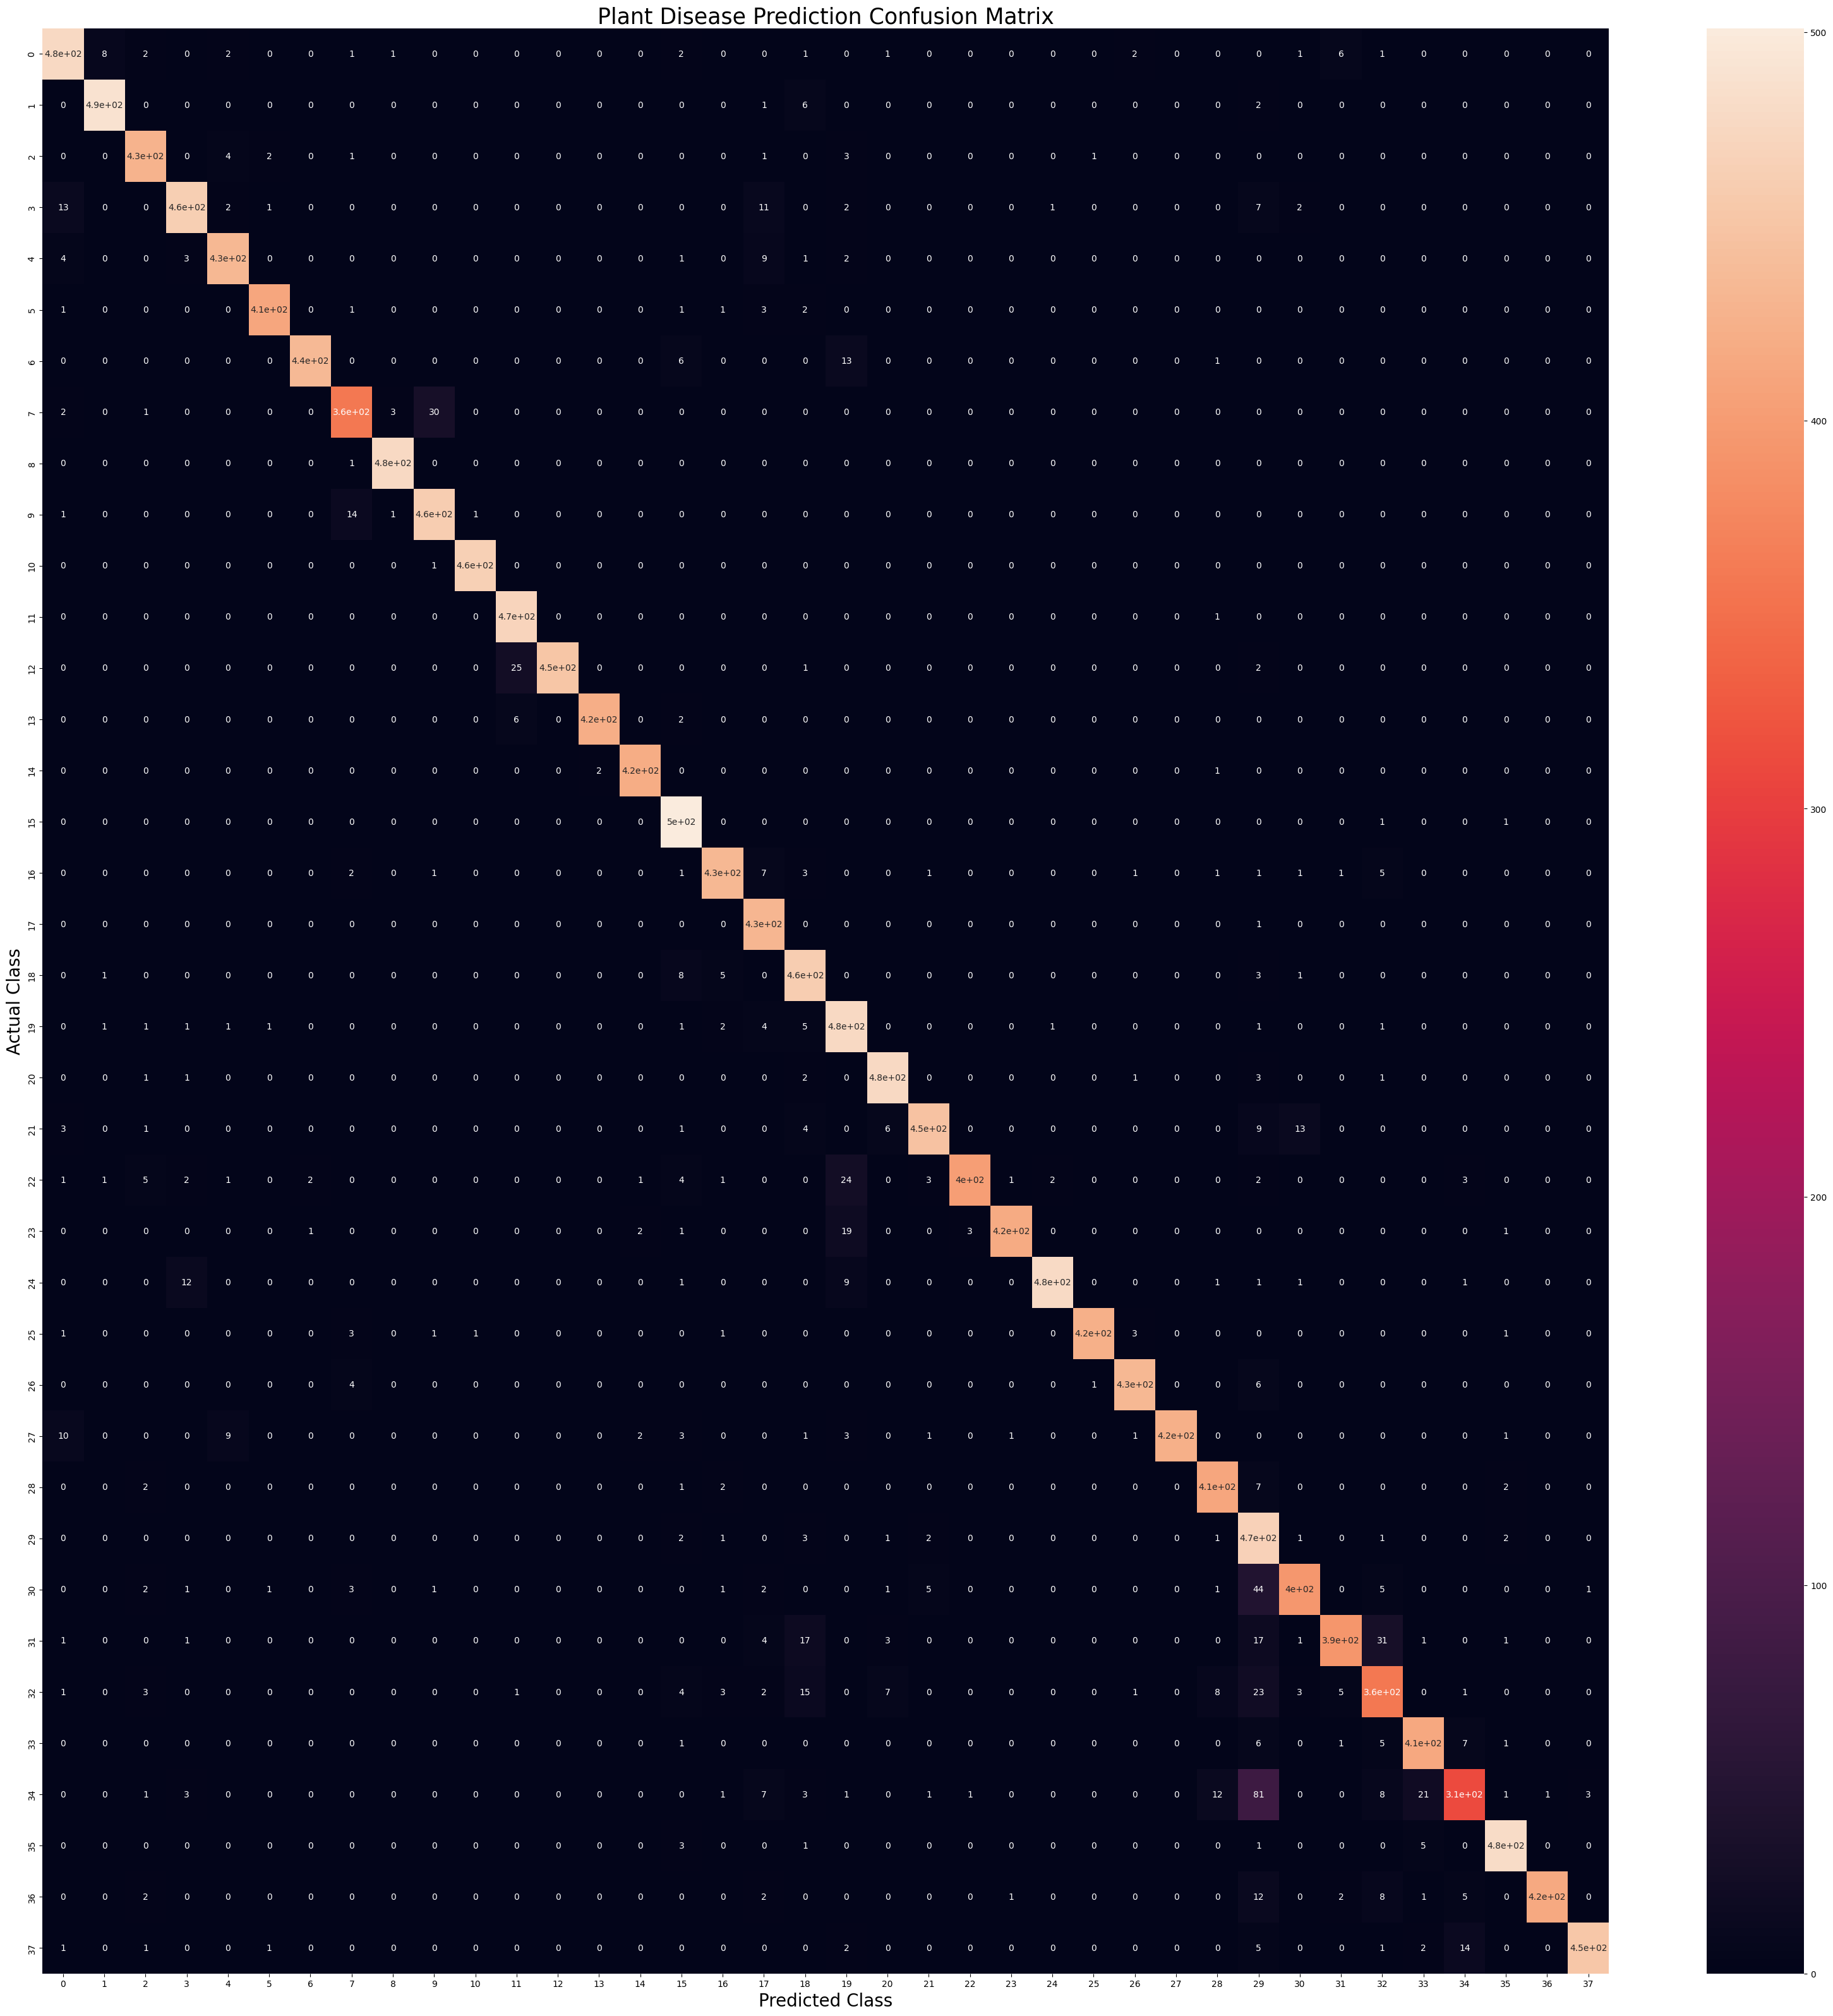

In [64]:
plt.figure(figsize=(40, 40))
sns.heatmap(cn,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()